In [1]:
import os, pandas as pd, numpy as np

In [2]:
os.chdir("D:\\VCU Bootcamp\\SCMA\\Data")

In [3]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [4]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [5]:
ASSM = df[df['state_1']=="ASSM"]

In [6]:
ASSM.isnull().sum().sort_values(ascending = False)

soyabean_q             3440
soyabean_v             3440
Meals_School           3324
Meals_Employer         3288
Otherwise_possessed    3256
                       ... 
bhindi_q                  0
chillig_q                 0
palak_q                   0
carrot_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [7]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [8]:
ASSM_new = ASSM[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [9]:
ASSM_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       30
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [10]:
ASSM_clean =ASSM_new.copy()

In [11]:
ASSM_clean.loc[:, 'Meals_At_Home'] = ASSM_clean['Meals_At_Home'].fillna(ASSM_new['Meals_At_Home'].mean())

In [12]:
ASSM_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [13]:
# Outlier Checking

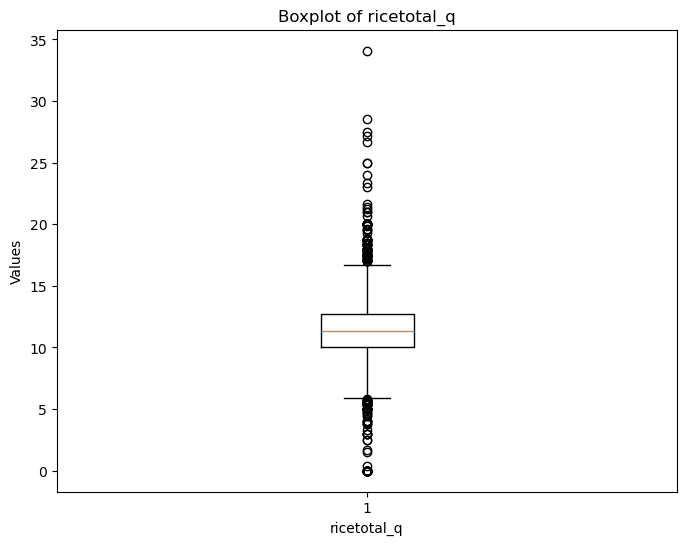

In [14]:
import matplotlib.pyplot as plt
# Assuming ASSM_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(ASSM_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [15]:
rice1 = ASSM_clean['ricetotal_q'].quantile(0.25)
rice2 = ASSM_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [16]:
ASSM_clean=ASSM_new[(ASSM_new['ricetotal_q']<=up_limit)&(ASSM_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1db4d629790>,
 'caps': [<matplotlib.lines.Line2D at 0x1db4d62b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db4d5710d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1db4d634910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db4d635450>],
 'means': []}

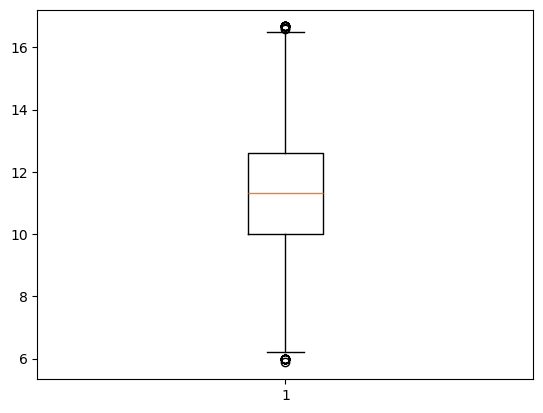

In [17]:
plt.boxplot(ASSM_clean['ricetotal_q'])

In [18]:
ASSM_clean['District'].unique()

array([16, 17, 15, 27, 18, 14, 13, 26, 20, 21, 24, 19, 23, 22,  7,  8,  6,
       12, 11,  9, 10,  4,  3,  2,  1,  5, 25], dtype=int64)

In [19]:
# Replace values in the 'Sector' column
ASSM_clean.loc[:,'Sector'] = ASSM_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [20]:
#total consumption

In [21]:
ASSM_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [22]:
ASSM_clean.loc[:, 'total_consumption'] = ASSM_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\pushp\AppData\Local\Temp\ipykernel_17948\4246160508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASSM_clean.loc[:, 'total_consumption'] = ASSM_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [23]:
ASSM_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
16933,ASSM,16,RURAL,1,181,11.428571,1.428571,0.142857,0,0.142857,1.142857,37.257779,45.724000,90.0,97.267493
16934,ASSM,16,RURAL,1,181,11.666667,1.666667,0.333333,0,0.666667,0.000000,41.168142,66.680000,90.0,122.181475
16935,ASSM,16,RURAL,1,181,6.250000,1.500000,0.000000,0,0.250000,0.050000,26.776187,125.012500,90.0,159.838687
16936,ASSM,16,RURAL,1,181,7.666667,5.000000,1.000000,0,0.000000,0.266667,47.533970,133.366667,90.0,194.833970
16937,ASSM,16,RURAL,1,181,9.750000,1.000000,0.000000,0,0.125000,0.150000,19.656843,68.755000,90.0,99.436843


In [24]:
ASSM_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              36.353002  63.492855  309.953685  22.886990
2              31.500568  63.682350  255.033725  22.716910
3              14.901990  44.551629  164.875651  21.470152
4              23.913543  57.218427  211.902400  24.066806

In [25]:
ASSM_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                37.261446  68.037094  255.033725  27.960298
2                20.643416  55.530331  172.580661  29.602718
3                36.493495  70.327786  240.236925  23.966825
4                40.781968  80.637368  216.591400  23.851316
5                25.362360  57.054137  207.079775  26.700164
6                25.689309  59.462135  172.467570  28.768226
7                28.929624  60.621004  191.961200  28.051629
8                24.647690  62.447952  174.030150  33.316957
9                17.318574  48.726602  137.225483  24.066806
10               30.762672  61.479311  201.169135  26.670450
11               15.112029  52.366168  133.170898  25.514517
12               30.838318  65.239722  282.570340  29.698395
13               25.610531  64.933889  199.710555  34.339009
14               49.522866  63.299993  309.953685  22.886990
15               37.572260  57.576728  285.441553  25.130180
16               35.946723  64.287060  200.972970  30.766878
17               39.031172  71.645116  235.558286  32.714349
18               27.915246  58.090127  152.445280  26.648582
19                9.857789  39.791733   93.878150  24.500135
20               19.599531  46.141782  164.875651  25.537591
21               14.610040  47.718865  106.430262  21.470152
22               14.759111  44.642043   98.587712  24.583400
23               14.210079  43.908214  115.083733  26.910494
24               34.274294  73.701847  215.779442  37.140360
25               11.053478  48.249954   74.490145  28.362723
26               36.226501  70.124867  189.200758  22.716910
27               25.232949  61.474892  211.902400  31.400156

In [26]:
total_consumption_by_districtcode=ASSM_clean.groupby('District')['total_consumption'].sum()

In [27]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
5     10555.015332
10     9959.648319
6      9454.479487
Name: total_consumption, dtype: float64

In [42]:
ASSM_clean.loc[:,"District"] = ASSM_clean.loc[:,"District"].replace({5: "Barpeta", 10: "Nagaon", 6: "Kamrup"})

In [43]:
total_consumption_by_districtname=ASSM_clean.groupby('District')['total_consumption'].sum()

In [44]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Faridabad    16829.789693
Jind         14855.129103
Sirsa        10702.037831
Name: total_consumption, dtype: float64

In [45]:
from statsmodels.stats import weightstats as stests

In [46]:
rural=ASSM_clean[ASSM_clean['Sector']=="RURAL"]
urban=ASSM_clean[ASSM_clean['Sector']=="URBAN"]

In [57]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
6777,AP,Hyderabad and Rangar,RURAL,3,283,5.0,1.666667,0.166667,0,0.166667,0.083333,18.308732,23.337333,60.0,48.729398
6778,AP,Hyderabad and Rangar,RURAL,3,283,15.0,0.000000,0.000000,0,0.500000,0.000000,29.781670,10.000000,60.0,55.281670
6779,AP,Hyderabad and Rangar,RURAL,3,283,9.0,0.400000,0.000000,0,0.100000,0.000000,18.412530,0.000000,60.0,27.912530
6780,AP,Hyderabad and Rangar,RURAL,3,283,11.5,1.250000,0.062500,0,0.250000,0.125000,24.025527,0.006000,60.0,37.219027
6781,AP,Hyderabad and Rangar,RURAL,3,283,12.0,1.000000,0.000000,0,0.100000,0.100000,22.070518,10.000000,84.0,45.270518


In [58]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
62733,AP,16,URBAN,2,282,10.0,2.000000,0.000000,0,0.000000,0.0,38.850555,0.000,60.0,50.850555
62734,AP,16,URBAN,2,282,10.0,0.333333,0.166667,0,0.333333,0.0,30.317625,76.678,60.0,117.828958
62735,AP,16,URBAN,2,282,11.5,0.500000,0.250000,0,0.500000,0.0,29.801230,49.000,60.0,91.551230
62736,AP,16,URBAN,2,282,10.0,0.000000,0.200000,0,0.200000,0.0,24.600460,70.000,60.0,105.000460
62737,AP,16,URBAN,2,282,10.0,0.500000,0.000000,0,0.250000,0.0,31.025635,50.000,60.0,91.775635


In [59]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [60]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 12.52569222339867
P-Value: 5.4017986377956026e-36
